# Decomposed_Learning_Results (CL* Algorithm)


In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, kstest, shapiro, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [352]:
# don't run this if you use google colab 
df =  pd.read_csv('data/Results.csv',index_col=False)

## Clean data

In [353]:
def round_data(data):
  return round(data, 3)

In [354]:
df = df[(df["STATES"]<=3840) & (df["STATES"]>500) ]

In [355]:
df = df.dropna(axis=1, how='all')
df = df.dropna()
df

,FILE_NAME,STATES,INPUTS,LSTAR_MQ_SYM,LSTAR_MQ_RST,LSTAR_EQ_SYM,LSTAR_EQ_RST,LSTAR_TOTAL_SYM,LSTAR_TOTAL_RST,LSTAR_EQs,CLSTAR_MQ_SYM,CLSTAR_MQ_RST,CLSTAR_EQ_SYM,CLSTAR_EQ_RST,CLSTAR_TOTAL_SYM,CLSTAR_TOTAL_RST,CLSTAR_EQs,CLSTAR_COMPONENTS,CLSTAR_ROUNDS,CACHE
12,Real-Tests/data/Reals_With_5_Components1.txt,894,16,3573813,192659,75150,502,3648963,193161,2,10793711,140952,2571316,17124,13365027,158076,144,3,13,True
13,Real-Tests/data/Reals_With_5_Components2.txt,1248,19,16770435,468084,79968,532,16850403,468616,3,9206471,138978,4524659,30172,13731130,169150,239,3,19,True
16,Real-Tests/data/Reals_With_6_Components1.txt,1248,25,17216250,944919,75307,503,17291557,945422,2,10392270,127108,6946225,46173,17338495,173281,357,6,21,True
20,Real-Tests/data/Reals_With_7_Components1.txt,2808,27,5913675,734859,73957,500,5987632,735359,1,1118142,15758,8663125,57680,9781267,73438,395,6,22,True
21,Real-Tests/data/Reals_With_7_Components2.txt,1152,23,16425875,356431,75121,504,16500996,356935,2,20335806,240652,5497912,36680,25833718,277332,303,5,19,True
22,Real-Tests/data/Reals_With_7_Components3.txt,1248,22,21942378,826896,75750,508,22018128,827404,3,13305768,161125,6564041,43668,19869809,204793,280,6,18,True
23,Real-Tests/data/Reals_With_7_Components4.txt,1296,23,2970887,457079,75768,500,3046655,457579,1,201634,2769,5795394,38632,5997028,41401,273,7,17,True
25,Real-Tests/data/Reals_With_8_Components2.txt,1664,23,24286831,1123105,76638,507,24363469,1123612,3,10041596,134127,7075319,47161,17116915,181288,294,7,18,True
30,Real-Tests/data/Reals_With_9_Components3.txt,2880,23,9699808,633123,76305,507,9776113,633630,2,4550760,52709,9168887,61165,13719647,113874,349,7,21,True
31,Real-Tests/data/Reals_With_9_Components4.txt,1536,21,4854549,677397,74028,500,4928577,677897,1,5123,645,6101511,40616,6106634,41261,232,9,15,True


In [356]:
# Calculate mean without outliers
from scipy import stats
def trimmed_mean(x):
  z = stats.zscore(x)
  d_z = x.loc[z<3,]
  return d_z.mean()


## Statistical Analysis

In [357]:
# @title Bins
bins = [500,1000,1500,2000,2500,3000]
labels = []

We cluster the benchmark into eight categories based on the FSM’s number of states to summerize the results and illusterate them.

In [358]:
# Data Distribution
print("Count:  ",df['FILE_NAME'].unique().size)
print("Min:    ",df.groupby('FILE_NAME').agg(min)['STATES'].min())
print("Max:    ",df.groupby('FILE_NAME').agg(min)['STATES'].max())

print("mean:   ", df.groupby('FILE_NAME').agg(min)['STATES'].mean())

print("std:    ", df.groupby('FILE_NAME').agg(min)['STATES'].std())

Count:   10
Min:     894
Max:     2880
mean:    1597.4
std:     688.7231664464322


C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\2303827582.py:3: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("Min:    ",df.groupby('FILE_NAME').agg(min)['STATES'].min())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\2303827582.py:4: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("Max:    ",df.groupby('FILE_NAME').agg(min)['STATES'].max())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\2303827582.py:6: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current

In [359]:
# calculate the progress 

df['CLSTAR_TOTAL_RST_progress'] = (1 - (df['CLSTAR_TOTAL_RST'] / df['CLSTAR_TOTAL_RST']))*100
df['CLSTAR_TOTAL_SYM_progress'] = (1 - (df['CLSTAR_TOTAL_SYM'] / df['CLSTAR_TOTAL_SYM']))*100

df['CLSTAR_MQ_SYM_progress'] = (1 - (df['CLSTAR_MQ_SYM'] / df['CLSTAR_MQ_SYM']))*100
df['CLSTAR_MQ_RST_progress'] = (1 - (df['CLSTAR_MQ_RST'] / df['CLSTAR_MQ_RST']))*100
df['CLSTAR_EQ_SYM_progress'] = (1 - (df['CLSTAR_EQ_SYM'] / df['CLSTAR_EQ_SYM']))*100
df['CLSTAR_EQ_RST_progress'] = (1 - (df['CLSTAR_EQ_RST'] / df['CLSTAR_EQ_RST']))*100


In [360]:
# @title Check for normal
for i in range(0, len(bins)-1):
    data = df[df['STATES']>bins[i] & (df['STATES']<=bins[i+1])]
    states_count = data.loc[:,'STATES']
    input_count = data.loc[:,'INPUTS']
    lstar_resets_count = data.loc[:,  'CLSTAR_TOTAL_RST']
    CLSTAR_resets_count = data.loc[:, 'CLSTAR_TOTAL_RST']
    lstar_symbols_count = data.loc[:, 'CLSTAR_TOTAL_SYM']
    CLSTAR_symbols_count = data.loc[:,'CLSTAR_TOTAL_SYM']
    print(bins[i],  '-', bins[i+1])
    print(kstest(states_count,'norm'))
    print(kstest(lstar_resets_count,'norm'))
    print(kstest(CLSTAR_resets_count,'norm'))
    print(kstest(lstar_symbols_count,'norm'))
    print(kstest(CLSTAR_symbols_count,'norm'))

    print(shapiro(states_count))
    print(shapiro(lstar_resets_count))
    print(shapiro(CLSTAR_resets_count))
    print(shapiro(lstar_symbols_count))
    print(shapiro(CLSTAR_symbols_count))



500 - 1000
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=894, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=41261, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=41261, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=5997028, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=5997028, statistic_sign=-1)
ShapiroResult(statistic=0.7679395401396794, pvalue=0.005902577702416774)
ShapiroResult(statistic=0.9398885825758383, pvalue=0.5517742578665523)
ShapiroResult(statistic=0.9398885825758383, pvalue=0.5517742578665523)
ShapiroResult(statistic=0.9539451171983561, pvalue=0.7152407973688752)
ShapiroResult(statistic=0.9539451171983561, pvalue=0.7152407973688752)
1000 - 1500
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=894, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=41261, statistic_sign=-1)
KstestResult(statistic=1.

In [361]:
# @title Cluster Items

grouped = df.groupby(pd.cut(df["STATES"],bins))
df3 = grouped.agg(
    # states = pd.NamedAgg(column='STATES', aggfunc="min"),
    inputs=pd.NamedAgg(column="INPUTS", aggfunc='median'),

    LSTAR_total_sym_median=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc='median'),
    LSTAR_total_sym_mean=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc='mean'),
    LSTAR_total_sym_std=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc="std"),
    LSTAR_total_reset_median=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc='median'),
    LSTAR_total_reset_mean=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc='mean'),
    LSTAR_total_reset_std=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc="std"),
    LSTAR_mq_sym_mean=pd.NamedAgg(column='LSTAR_MQ_SYM', aggfunc='median'),
    LSTAR_mq_sym_std=pd.NamedAgg(column='LSTAR_MQ_SYM', aggfunc="std"),
    LSTAR_mq_reset_mean=pd.NamedAgg(column='LSTAR_MQ_RST', aggfunc='median'),
    LSTAR_mq_reset_std=pd.NamedAgg(column='LSTAR_MQ_RST', aggfunc="std"),
    LSTAR_eq_sym_mean=pd.NamedAgg(column='LSTAR_EQ_SYM', aggfunc='median'),
    LSTAR_eq_sym_std=pd.NamedAgg(column='LSTAR_EQ_SYM', aggfunc="std"),
    LSTAR_eq_reset_mean=pd.NamedAgg(column='LSTAR_EQ_RST', aggfunc='median'),
    LSTAR_eq_reset_std=pd.NamedAgg(column='LSTAR_EQ_RST', aggfunc="std"),
    LSTAR_eqs=pd.NamedAgg(column='LSTAR_EQs', aggfunc='median'),

    CLSTAR_total_sym_median=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc='mean'),
    CLSTAR_total_sym_mean=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc='median'),
    CLSTAR_total_sym_std=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc="std"),
    CLSTAR_total_reset_median=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc='median'),
    CLSTAR_total_reset_mean=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc='mean'),
    CLSTAR_total_reset_std=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc="std"),
    CLSTAR_mq_sym_mean=pd.NamedAgg(column='CLSTAR_MQ_SYM', aggfunc='median'),
    CLSTAR_mq_sym_std=pd.NamedAgg(column='CLSTAR_MQ_SYM', aggfunc="std"),
    CLSTAR_mq_reset_mean=pd.NamedAgg(column='CLSTAR_MQ_RST', aggfunc='median'),
    CLSTAR_mq_reset_std=pd.NamedAgg(column='CLSTAR_MQ_RST', aggfunc="std"),
    CLSTAR_eq_sym_mean=pd.NamedAgg(column='CLSTAR_EQ_SYM', aggfunc='median'),
    CLSTAR_eq_sym_std=pd.NamedAgg(column='CLSTAR_EQ_SYM', aggfunc="std"),
    CLSTAR_eq_reset_mean=pd.NamedAgg(column='CLSTAR_EQ_RST', aggfunc='median'),
    CLSTAR_eq_reset_std=pd.NamedAgg(column='CLSTAR_EQ_RST', aggfunc="std"),
    CLSTAR_eqs=pd.NamedAgg(column='CLSTAR_EQs', aggfunc='median'),
    CLSTAR_components=pd.NamedAgg(column='CLSTAR_COMPONENTS', aggfunc='median'),
    CLSTAR_rounds=pd.NamedAgg(column='CLSTAR_ROUNDS', aggfunc='median'),

).reset_index()

C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\1729249584.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(pd.cut(df["STATES"],bins))


In [362]:
# Progress
df3['CLSTAR_TOTAL_SYM_progress'] = (1 - (df3['CLSTAR_total_sym_mean'] / df3['LSTAR_total_sym_mean']))*100
df3['CLSTAR_TOTAL_RST_progress'] = (1 - (df3['CLSTAR_total_reset_mean'] / df3['LSTAR_total_reset_mean']))*100
df3['CLSTAR_MQ_SYM_progress'] = (1 - (df3['CLSTAR_mq_sym_mean'] / df3['LSTAR_mq_sym_mean']))*100
df3['CLSTAR_MQ_RST_progress'] = (1 - (df3['CLSTAR_mq_reset_mean'] / df3['LSTAR_mq_reset_mean']))*100
df3['CLSTAR_EQ_SYM_progress'] = (1 - (df3['CLSTAR_eq_sym_mean'] / df3['LSTAR_eq_sym_mean']))*100
df3['CLSTAR_EQ_RST_progress'] = (1 - (df3['CLSTAR_eq_reset_mean'] / df3['LSTAR_eq_reset_mean']))*100

In [374]:
# @title Pvalue 
pvalue_info = {'STATES':[],
'CLSTAR_TOTAL_SYM_pvalue':[],
'CLSTAR_TOTAL_RST_pvalue':[],
              }
for index, row in df3.iterrows():
  data_range = row['STATES']
  filtered_df = df[(df['STATES']<data_range.right) & (df['STATES']>=data_range.left)]
  mq_sym_ttest = ttest_rel(filtered_df.loc[:,'CLSTAR_TOTAL_SYM'], filtered_df.loc[:,'LSTAR_TOTAL_SYM'], alternative='less').pvalue
  eq_reset_ttest = ttest_rel(filtered_df.loc[:,'CLSTAR_TOTAL_RST'], filtered_df.loc[:,'LSTAR_TOTAL_RST'], alternative='less').pvalue
  pvalue_info['STATES'].append(data_range)
  pvalue_info['CLSTAR_TOTAL_SYM_pvalue'].append(mq_sym_ttest)
  pvalue_info['CLSTAR_TOTAL_RST_pvalue'].append(eq_reset_ttest)

pvalue_df = pd.DataFrame(pvalue_info)
final_df = pd.merge(df3, pvalue_df,how='right', on='STATES')

STATES                       (500, 1000]
inputs                              16.0
LSTAR_total_sym_median         3648963.0
LSTAR_total_sym_mean           3648963.0
LSTAR_total_sym_std                  NaN
LSTAR_total_reset_median        193161.0
LSTAR_total_reset_mean          193161.0
LSTAR_total_reset_std                NaN
LSTAR_mq_sym_mean              3573813.0
LSTAR_mq_sym_std                     NaN
LSTAR_mq_reset_mean             192659.0
LSTAR_mq_reset_std                   NaN
LSTAR_eq_sym_mean                75150.0
LSTAR_eq_sym_std                     NaN
LSTAR_eq_reset_mean                502.0
LSTAR_eq_reset_std                   NaN
LSTAR_eqs                            2.0
CLSTAR_total_sym_median       13365027.0
CLSTAR_total_sym_mean         13365027.0
CLSTAR_total_sym_std                 NaN
CLSTAR_total_reset_median       158076.0
CLSTAR_total_reset_mean         158076.0
CLSTAR_total_reset_std               NaN
CLSTAR_mq_sym_mean            10793711.0
CLSTAR_mq_sym_st

C:\Users\Aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\Aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [364]:
final_df['CLSTAR_TOTAL_SYM_pvalue']

0         NaN
1    0.718889
2    0.301298
3         NaN
4    0.993834
Name: CLSTAR_TOTAL_SYM_pvalue, dtype: float64

In [365]:
final_df.columns

Index(['STATES', 'inputs', 'LSTAR_total_sym_median', 'LSTAR_total_sym_mean',
       'LSTAR_total_sym_std', 'LSTAR_total_reset_median',
       'LSTAR_total_reset_mean', 'LSTAR_total_reset_std', 'LSTAR_mq_sym_mean',
       'LSTAR_mq_sym_std', 'LSTAR_mq_reset_mean', 'LSTAR_mq_reset_std',
       'LSTAR_eq_sym_mean', 'LSTAR_eq_sym_std', 'LSTAR_eq_reset_mean',
       'LSTAR_eq_reset_std', 'LSTAR_eqs', 'CLSTAR_total_sym_median',
       'CLSTAR_total_sym_mean', 'CLSTAR_total_sym_std',
       'CLSTAR_total_reset_median', 'CLSTAR_total_reset_mean',
       'CLSTAR_total_reset_std', 'CLSTAR_mq_sym_mean', 'CLSTAR_mq_sym_std',
       'CLSTAR_mq_reset_mean', 'CLSTAR_mq_reset_std', 'CLSTAR_eq_sym_mean',
       'CLSTAR_eq_sym_std', 'CLSTAR_eq_reset_mean', 'CLSTAR_eq_reset_std',
       'CLSTAR_eqs', 'CLSTAR_components', 'CLSTAR_rounds',
       'CLSTAR_TOTAL_SYM_progress', 'CLSTAR_TOTAL_RST_progress',
       'CLSTAR_MQ_SYM_progress', 'CLSTAR_MQ_RST_progress',
       'CLSTAR_EQ_SYM_progress', 'CLSTAR_EQ_R

## Tables 

In [366]:
# @title Table 1
final_df[["STATES", "LSTAR_total_reset_mean", "LSTAR_total_reset_std", "CLSTAR_total_reset_mean", "CLSTAR_total_reset_std", "CLSTAR_TOTAL_RST_progress" ,"CLSTAR_TOTAL_RST_pvalue" ]]

,STATES,LSTAR_total_reset_mean,LSTAR_total_reset_std,CLSTAR_total_reset_mean,CLSTAR_total_reset_std,CLSTAR_TOTAL_RST_progress,CLSTAR_TOTAL_RST_pvalue
0,"(500, 1000]",193161.0,NaN,158076.0,NaN,18.163604,NaN
1,"(1000, 1500]",611191.2,258374.153813,173191.4,85482.419487,71.663303,0.011243
2,"(1500, 2000]",900754.5,315168.098977,111274.5,99014.041249,87.646523,0.060872
3,"(2000, 2500]",NaN,NaN,NaN,NaN,NaN,NaN
4,"(2500, 3000]",684494.5,71933.265743,93656.0,28592.569804,86.317494,0.038112


In [367]:
# @title Table 2
final_df[["STATES", "LSTAR_total_sym_mean", "LSTAR_total_sym_std", "CLSTAR_total_sym_mean", "CLSTAR_total_sym_std", "CLSTAR_TOTAL_SYM_progress" ,"CLSTAR_TOTAL_SYM_pvalue" ]]

,STATES,LSTAR_total_sym_mean,LSTAR_total_sym_std,CLSTAR_total_sym_mean,CLSTAR_total_sym_std,CLSTAR_TOTAL_SYM_progress,CLSTAR_TOTAL_SYM_pvalue
0,"(500, 1000]",3648963.0,NaN,13365027.0,NaN,-266.269184,NaN
1,"(1000, 1500]",15141547.8,7.123282e+06,17338495.0,7.367860e+06,-14.509396,0.718889
2,"(1500, 2000]",14646023.0,1.374254e+07,11611774.5,7.785444e+06,20.717218,0.301298
3,"(2000, 2500]",NaN,NaN,NaN,NaN,NaN,NaN
4,"(2500, 3000]",7881872.5,2.678861e+06,11750457.0,2.784855e+06,-49.082049,0.993834


In [368]:
final_df.to_csv("Results_summerized.csv")

# Plots

In [369]:
sns.set(rc={'figure.figsize':(15,6)})

C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\1459455666.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['state_range'] = pd.cut(d2['STATES'], bins= bins)
C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\1459455666.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['state_range'] = pd.cut(d1['STATES'], bins= bins)


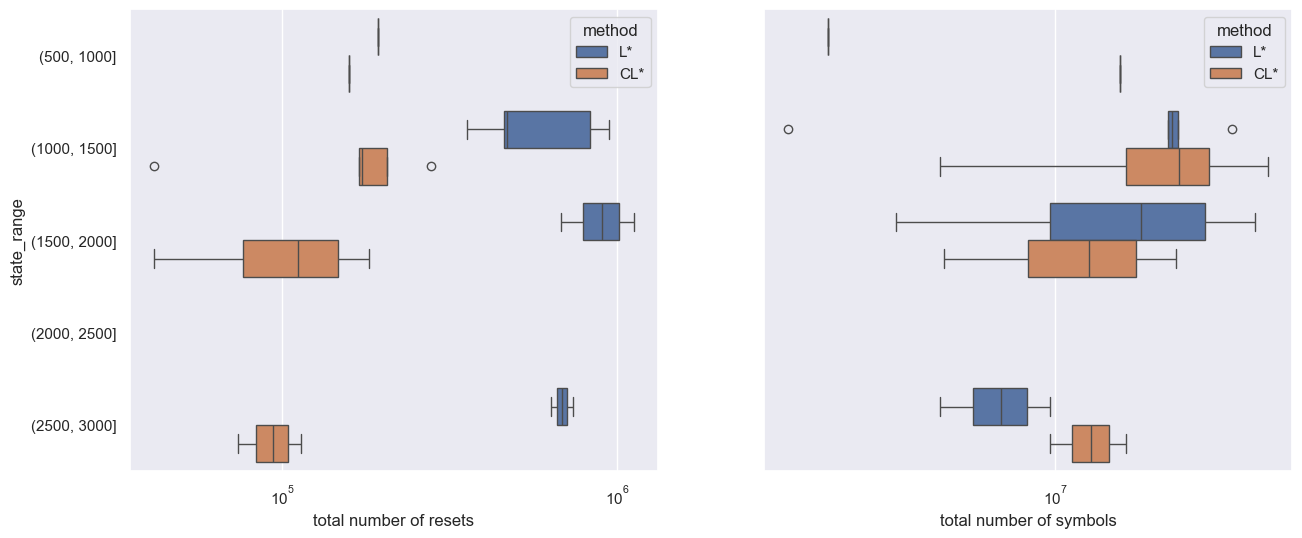

In [370]:
#  @title Fig 2. The total number of input symbols and resets in the CL∗ and L∗ methods
fig, axs = plt.subplots(ncols=2)

d2 = df[['STATES', 'LSTAR_TOTAL_RST', 'CLSTAR_TOTAL_RST']]
d2['state_range'] = pd.cut(d2['STATES'], bins= bins)
d2 = d2.set_index('state_range')

d2[['L*',  'CL*']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST']] 

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_1": "method", 0: "total number of resets"})

g1 = sns.boxplot(y = d2['state_range'],
			x = d2['total number of resets'],
			hue = d2['method'],
       showcaps=True,orient="h", ax=axs[0]).set_xscale('log')


d1 = df[['STATES', 'LSTAR_TOTAL_SYM', 'CLSTAR_TOTAL_SYM']]
d1['state_range'] = pd.cut(d1['STATES'], bins= bins)
d1 = d1.set_index('state_range')
d1[['L*',  'CL*']] = d1[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM']] 
d1 = d1[['L*',  'CL*']].stack().reset_index()
d1 = d1.rename(columns={"level_1": "method", 0: "total number of symbols"})

g2 = sns.boxplot(y = d1['state_range'],
			x = d1['total number of symbols'],
			hue = d1['method'],
       showcaps=True,orient="h", ax=axs[1])
g2.set_xscale('log')

g2.set(yticklabels=[])
g2.set(ylabel=None)
g2.tick_params(bottom=False) 
# plt.grid()
# plt.show()


C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\440006197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\440006197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykerne

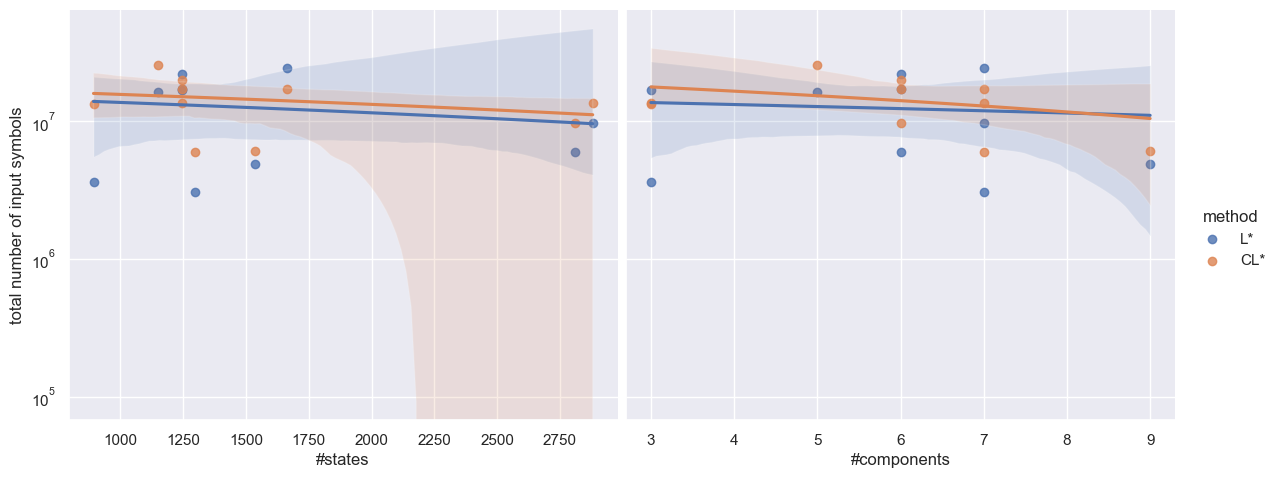

In [371]:
# @title Fig.3: The effect of FSM size in terms of number of components and states on total number of input symbols.
d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_SYM', 'CLSTAR_TOTAL_SYM']]

d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of input symbols"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of input symbols"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')


C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\1651643529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\1651643529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipyker

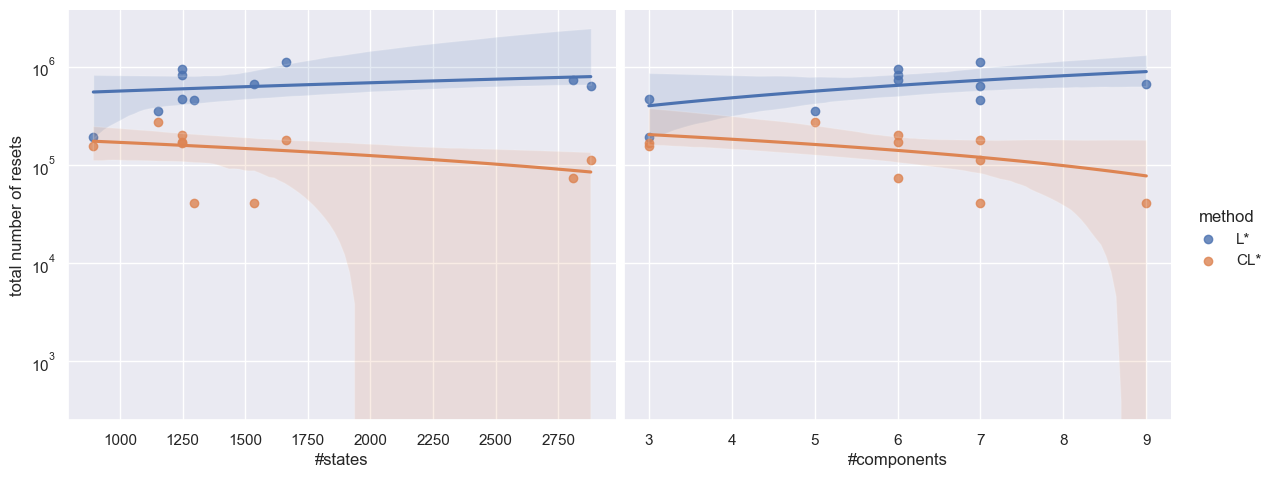

In [372]:
# @title Fig.4: The effect of FSM size in terms of number of components and states on total number of input resets.

d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_RST', 'CLSTAR_TOTAL_RST']]

d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of resets"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of resets"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')
